In [3]:
# Dependencies
import cv2
import numpy as np
# Builtins
from math import atan2, sqrt, sin, cos, pi

In [4]:
# Utilities

In [5]:
# Dev-Dependencies
import matplotlib.pyplot as plt

In [6]:
# Dev-Utilities
def imdisp(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.show()
def imdisp_components(labels):
    # Taken from StackOverflow
    # https://stackoverflow.com/questions/46441893/connected-component-labeling-in-python?noredirect=1&lq=1
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    # set bg label to black
    labeled_img[label_hue==0] = 0
    imdisp(labeled_img)

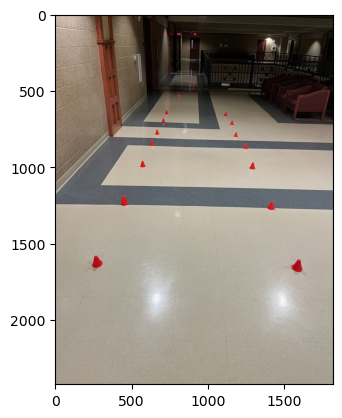

In [7]:
img = cv2.imread("red.png")
# In OpenCV we work with BGR for historical reasons
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# But for processing we want to use the L*a*b* colorspace
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# Let's make sure we did this right
imdisp(img)

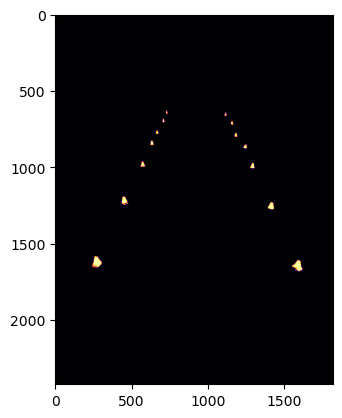

In [8]:
# We want to filter for the red color of the cones
# We can do a pretty good job of this since the a*
# axis of the L*a*b* colorspace tells you how red
# (or green) something is
COLOR_FILTER_LO = np.array([50, 160, 0])
COLOR_FILTER_HI = np.array([90, 255, 255])
mask = cv2.inRange(lab, COLOR_FILTER_LO, COLOR_FILTER_HI)
# Now, we need to "open" the mask to remove any
# speckle-like noise
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((5, 5), np.uint8))
imdisp(mask, cmap='inferno')

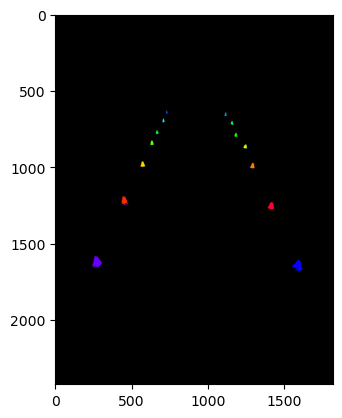

In [12]:
# Now, we're going to split it into it's connected components
_, components = cv2.connectedComponents(mask)
imdisp_components(components)

In [17]:
# Then, we pick the highest point in each component, which
# should correspond with the top of the cone